In [1]:
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

In [8]:
path = 'tensorboard/20201102-073529-timegan-eta001-b256'

In [9]:
with open(f"{path}/ori.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/new.pickle", "rb") as fb:
    new_data = pickle.load(fb)

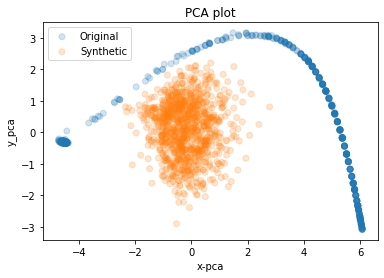

In [4]:
# eta: 10
visualization(ori_data, new_data, 'pca')

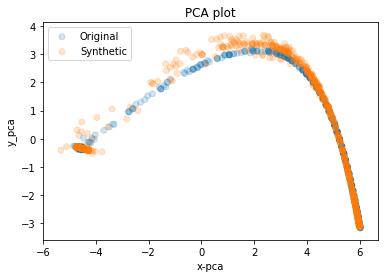

In [8]:
# eta: 10, hidden: 20
visualization(ori_data, new_data, 'pca')

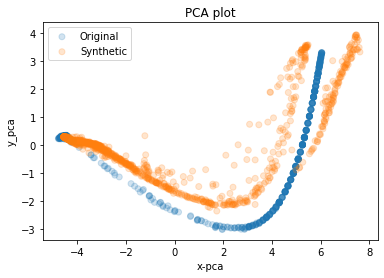

In [4]:
# new timegan
visualization(ori_data, new_data, 'pca')

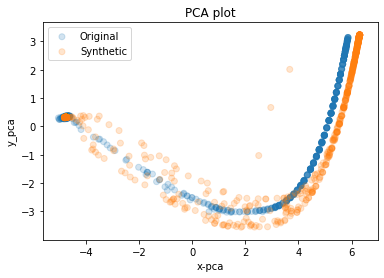

In [4]:
# new timegan + eta10
visualization(ori_data, new_data, 'pca')

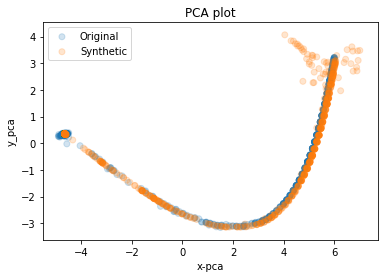

In [4]:
# new timegan + eta0.01 + bs256 + iteration20000
visualization(ori_data, new_data, 'pca')

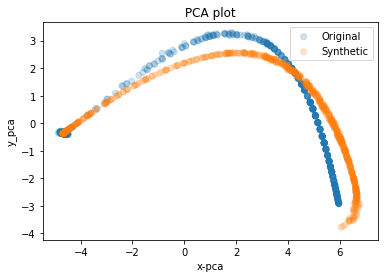

In [8]:
# new timegan + eta0.01 + bs256 + iteration6000
visualization(ori_data, new_data, 'pca')

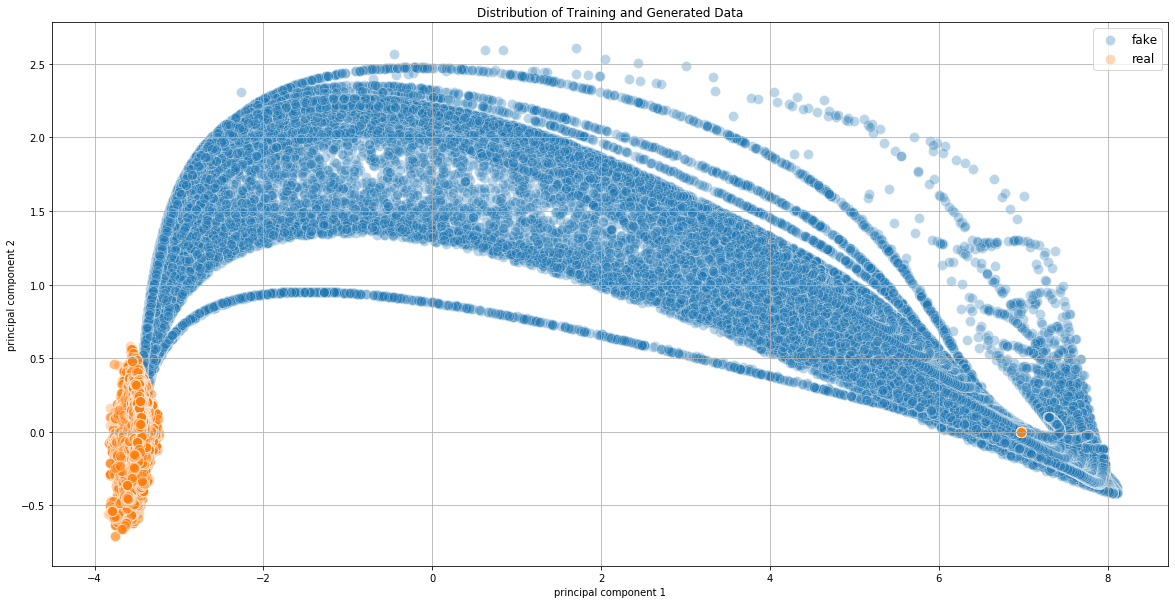

In [26]:
from sklearn.decomposition import PCA

ori_data = ori_data.reshape(385700, 71)
new_data = new_data.reshape(385700, 71)

X = np.concatenate((ori_data, new_data), axis=0)
Y = np.concatenate((np.ones([ori_data.shape[0]]), np.zeros(new_data.shape[0])), axis=0)

pca = PCA(n_components=2)
pca.fit(X)
output = pca.transform(X)

# X = StandardScaler().fit_transform(X)
Y = Y.reshape((Y.shape[0], 1))

result = np.concatenate((output, Y), axis=1)

result_df = pd.DataFrame(
    data=result, 
    columns=['principal component 1', 'principal component 2', 'label']
)

plt.figure(figsize=(20,10))

targets = {"fake": 0, "real": 1}
colors = ["tab:orange", "tab:"]

for target, color in zip(targets.values(),colors):
    idx = Y == target
    sns.scatterplot(
        x=result_df.loc[idx.squeeze(), 'principal component 1'],
        y=result_df.loc[idx.squeeze(), 'principal component 2'],
        s=100,
        alpha=0.3),
plt.legend(targets.keys(), prop={'size': 12})
plt.title("Distribution of Training and Generated Data") 
plt.grid()

In [13]:
ori_data.reshape

(3857, 100, 71)

In [18]:
ori_data.shape[0]*ori_data.shape[1]

385700

In [25]:
# result_df.loc[idx, 'principal component 1']
idx.shape

(771400, 1)

In [2]:
data = np.load('/data/workspace/TimeGAN-tensorflow2/submission/NeurIPS-2020-Hide-and-Seek-Privacy-Challenge/starting_kit/output/hider/data.npz')

In [4]:
print(data)

In [6]:
data['generated_data'].shape

(3857, 100, 71)

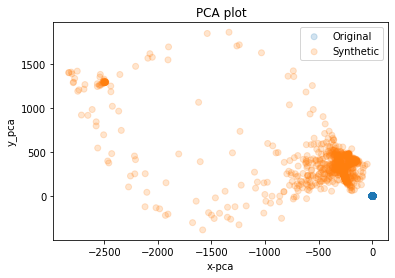

In [10]:
visualization(ori_data, data['generated_data'], 'pca')